In [1]:
import numpy as np
import pickle as pkl
from os.path import join
import torch
import matplotlib.pyplot as plt
import importlib
from sklearn.manifold import TSNE
from patbert.common import vis
from patbert.features import embeddings 
importlib.reload(embeddings)
import string

c:\Users\fjn197\Miniconda3\envs\patbert\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
vocab = torch.load(join('..','data', 'vocabs', 'simulated.pt'))
inv_vocab = {v: k for k, v in vocab.items()}
top_lvl_vocab = torch.load(join('..','data', 'vocabs', 'simulated_top_lvl.pt'))
token2top_lvl = torch.load(join('..','data', 'vocabs', 'simulated_token2top_lvl.pt'))

embedding = embeddings.HierarchicalEmbedding(vocab, top_lvl_vocab, token2top_lvl, embedding_dim=2)
embedding.weight = torch.nn.Parameter(embedding.initialize_weights())

In [6]:
vecs = embedding(torch.tensor(np.arange(len(vocab))))
vecs = vecs.detach().numpy()
for token, idx in vocab.items():
    if token.startswith('MD'):
        print(token, idx)

MD04J54 34
MD60G91 90
MD67E47 175


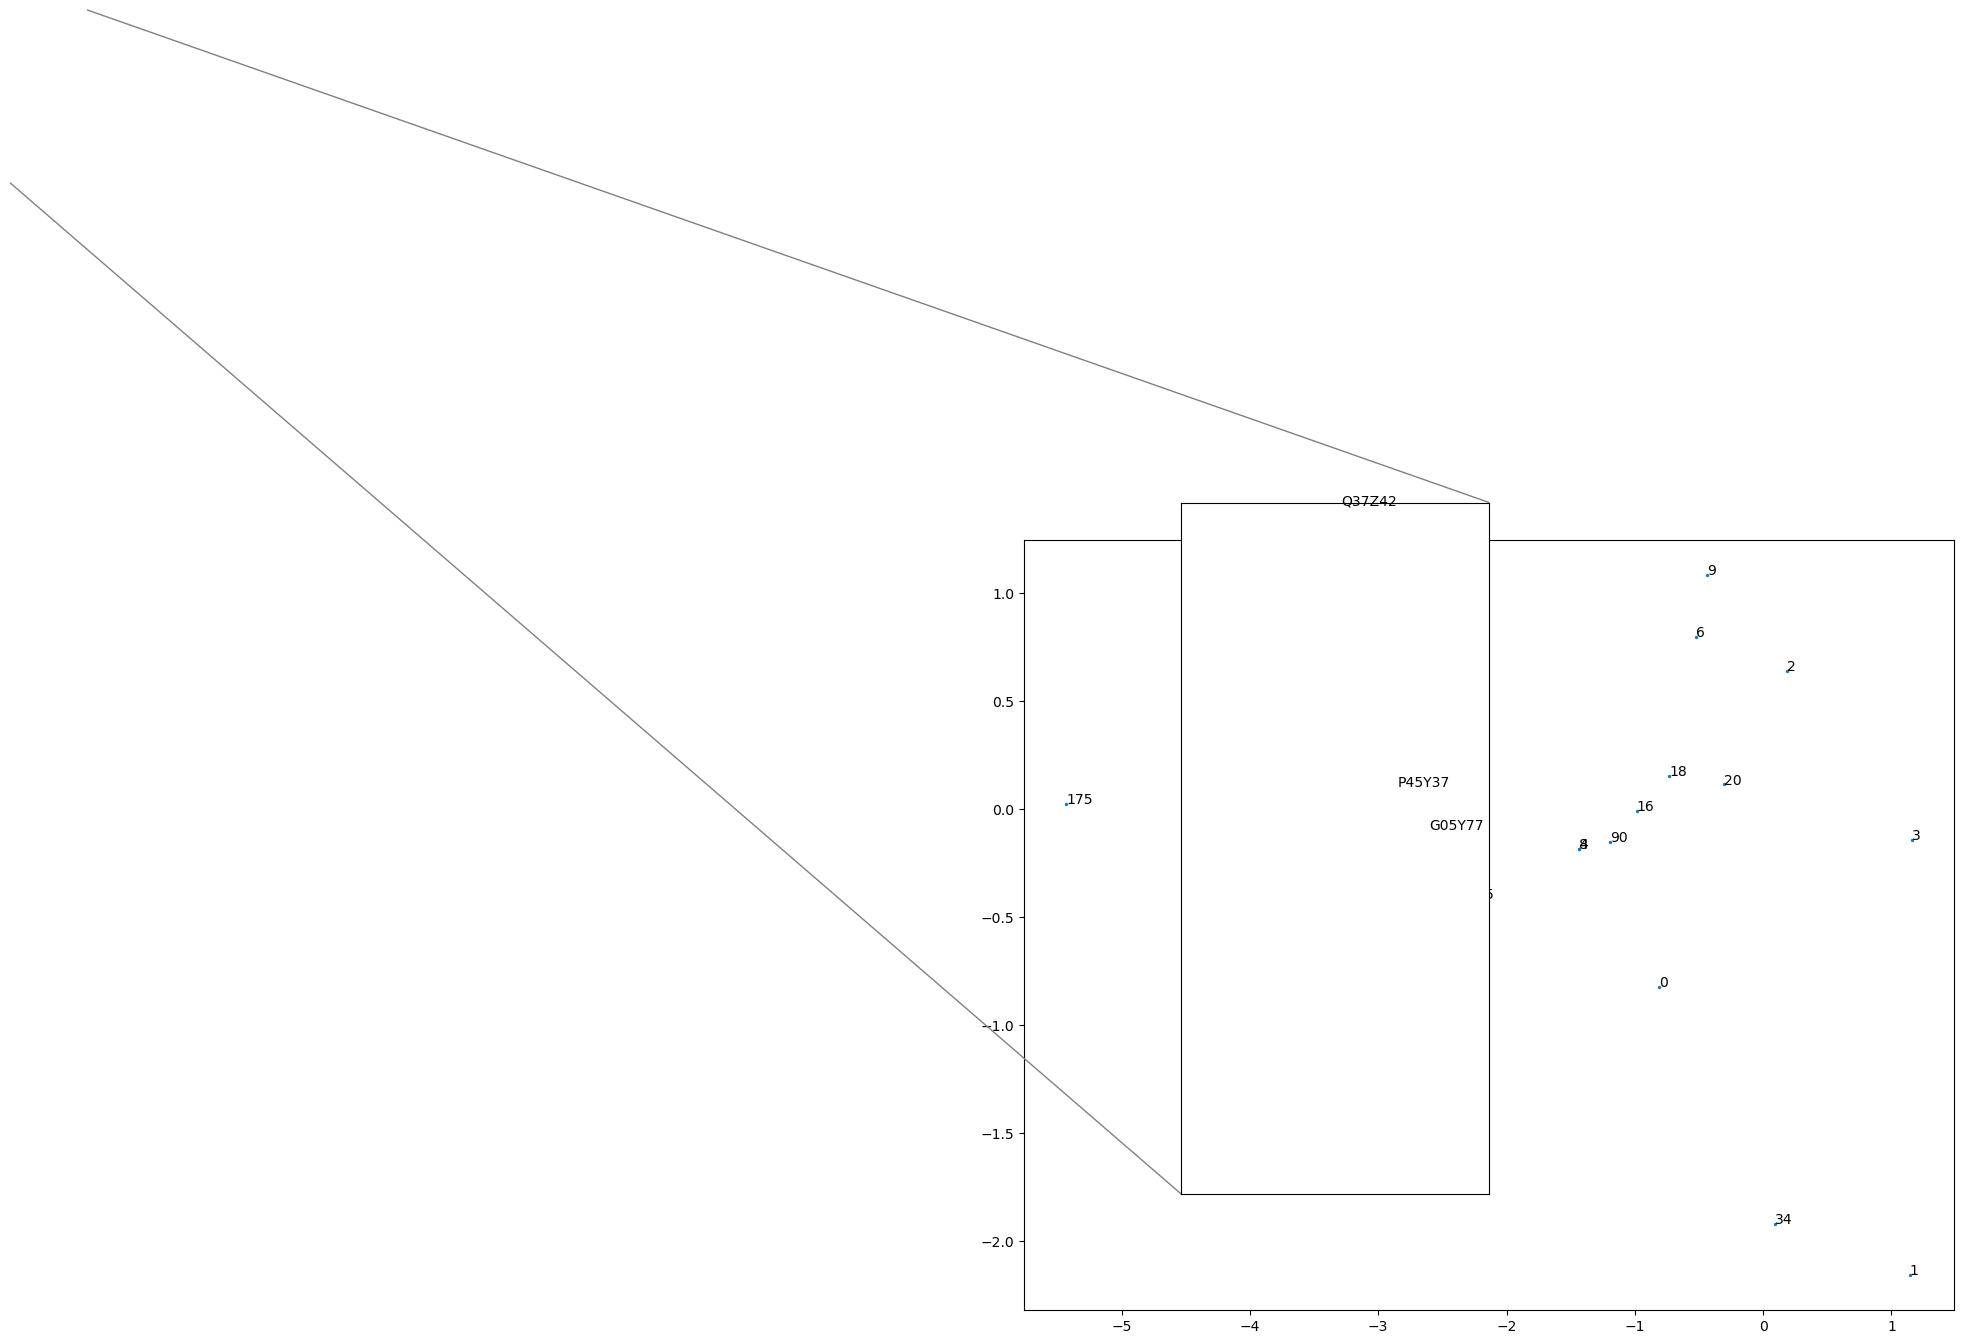

In [10]:
fig, ax = plt.subplots(figsize= (12,10))
plot_indices = [0,1,2,3,4,5,6,8,9, 16, 18, 20, 34, 90, 175]
for i in plot_indices:
    ax.text(vecs[i,0], vecs[i,1],f"{i:}", fontsize=10)
ax.scatter(vecs[plot_indices,0], vecs[plot_indices,1], s=2)

# Create the inset axis and plot the zoomed-in data
axins = vis.add_zoom_inset(ax, 4, 7, vecs[-1,0], vecs[-1,1],(vecs[-1,0]-.3, vecs[-1,0]+.3), (vecs[-1,1]-.4, vecs[-1,1]+.4),borderpad=0,
    bbox_to_anchor=(.5, .6), bbox_transform=ax.transAxes, mark_inset_loc=(1,3))

axins.scatter(vecs[plot_indices,0], vecs[plot_indices,1], s=2)
for i in [415, 416, 417]:
    axins.text(vecs[i,0], vecs[i,1], inv_vocab[i][1:], fontsize=10)
axins.axes.get_xaxis().set_visible(False)
axins.axes.get_yaxis().set_visible(False)
#for i in plot_indices:
 #   axins.text(vecs[i,0], vecs[i,1], inv_vocab[i], fontsize=6)